# Preliminariy research

## I - Use of the dataset of the Pima Indians Diabetes Database from Kaggle
Source of the dataset: https://www.kaggle.com/uciml/pima-indians-diabetes-database

This dataset consist of medical values such as number of pregancies, glucose level, blood pressure, skin thickness, insulin, BMI, diabetes pedigree function and age. The target is a binary variable that indicates if the patient has diabetes or not.

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read in the data
df = pd.read_csv('diabetesKaggle.csv')

### 1 - Dataset description

In [66]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [68]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


There is a total of 768 observations and 9 variables. The variables are:
- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)
- Outcome: Class variable (0 or 1) if the patient has diabetes or not

In [69]:
# show missing data
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Some data are missing, where the value is 0, but no NaN. We will replace these values with the mean of the column.

### 2 -  Data Preprocessing

In [70]:
# replace 0 data with NaN
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)

# show missing data
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [71]:
# replace all NaN data with mean
df.fillna(df.mean(), inplace=True)
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Data is now clean of missing values. We will now split the dataset into a training set and a test set. We will use the training set to train our model and the test set to evaluate the performance of our model.

### 3 - Visualisation of the data

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

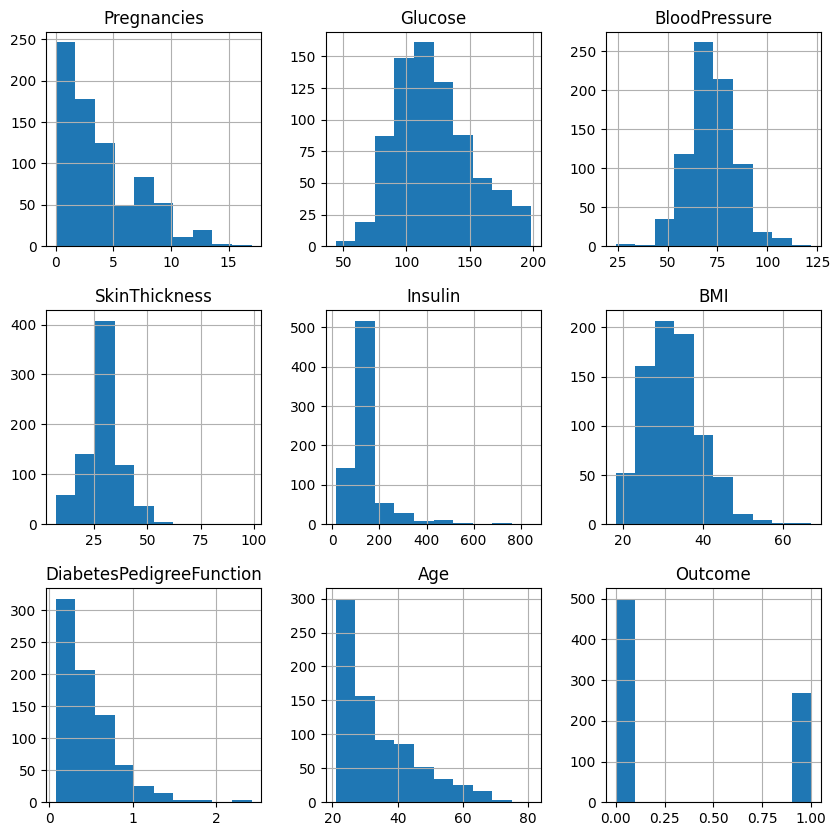

In [72]:
import seaborn as sns
df.hist(figsize=(10,10))

<Axes: >

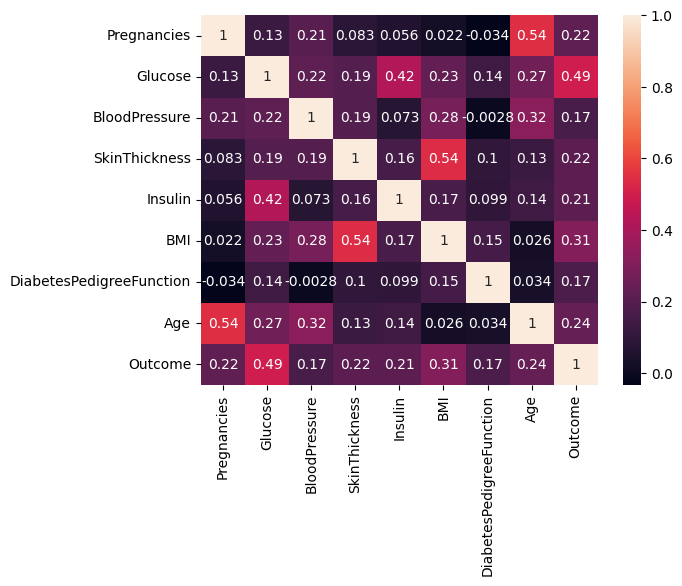

In [73]:
#heat map to show correlation
corr = df.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True)

### 4 - Test of different models

#### Split the dataset into a training set and a test set

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Logistic Regression

In [75]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(solver='liblinear')
logmodel.fit(X_train, y_train)
y_pred_logreg = logmodel.predict(X_test)

#### Decision Tree

In [76]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)

#### Random Forest

In [86]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

#### Support Vector Machine

In [78]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

#### K-Nearest Neighbors

In [79]:
from sklearn.neighbors import KNeighborsClassifier

for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    print("KNN with k = " + str(i) + " has accuracy of " + str(accuracy_score(y_test, y_pred_knn)))

KNN with k = 1 has accuracy of 0.6688311688311688
KNN with k = 2 has accuracy of 0.6883116883116883
KNN with k = 3 has accuracy of 0.6753246753246753
KNN with k = 4 has accuracy of 0.7142857142857143
KNN with k = 5 has accuracy of 0.6493506493506493
KNN with k = 6 has accuracy of 0.6688311688311688
KNN with k = 7 has accuracy of 0.6558441558441559
KNN with k = 8 has accuracy of 0.6883116883116883
KNN with k = 9 has accuracy of 0.6883116883116883
KNN with k = 10 has accuracy of 0.7142857142857143
KNN with k = 11 has accuracy of 0.7012987012987013
KNN with k = 12 has accuracy of 0.7012987012987013
KNN with k = 13 has accuracy of 0.7012987012987013
KNN with k = 14 has accuracy of 0.7337662337662337
KNN with k = 15 has accuracy of 0.7142857142857143
KNN with k = 16 has accuracy of 0.7402597402597403
KNN with k = 17 has accuracy of 0.7272727272727273
KNN with k = 18 has accuracy of 0.7402597402597403
KNN with k = 19 has accuracy of 0.7337662337662337
KNN with k = 20 has accuracy of 0.746753

We can see that the best accuracy for kNN is when k=21.

In [80]:
knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

#### Test accuracy of the models

In [88]:
print('Logistic Regression: {:.5f}'.format(accuracy_score(y_test, y_pred_logreg)))
print('Decision Tree: {:.5f}'.format(accuracy_score(y_test, y_pred_dtree)))
print('Random Forest: {:.5f}'.format(accuracy_score(y_test, y_pred_rfc)))
print('SVC: {:.5f}'.format(accuracy_score(y_test, y_pred_svc)))
print('KNN: {:.5f}'.format(accuracy_score(y_test, y_pred_knn)))

Logistic Regression: 0.78571
Decision Tree: 0.70130
Random Forest: 0.74675
SVC: 0.75974
KNN: 0.75325
